In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


In [4]:
print(x_test.shape, y_test.shape)

(10000, 28, 28) (10000,)


In [5]:
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [6]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 784)
60000 train samples
10000 test samples


In [7]:
batch_size = 64
num_hidden = 512
num_classes = 10
epochs = 30

In [8]:
model = Sequential()
model.add(Dense(num_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(num_hidden, name='dense_layer_2', activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_hidden, name='dense_layer_3', activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, name='dense_layer_4', activation = 'softmax'))
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer (Dense)         (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_layer_2 (Dense)       (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_layer_3 (Dense)       (None, 512)               262656    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_layer_4 (Dense)       (None, 10)                5

In [10]:
hist = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,validation_split=0.2)

Epoch 1/30
750/750 [==============================] - 8s 9ms/step - loss: 0.3005 - accuracy: 0.9078 - val_loss: 0.1180 - val_accuracy: 0.9650
Epoch 2/30
750/750 [==============================] - 7s 9ms/step - loss: 0.1415 - accuracy: 0.9579 - val_loss: 0.0968 - val_accuracy: 0.9709
Epoch 3/30
750/750 [==============================] - 7s 9ms/step - loss: 0.1146 - accuracy: 0.9661 - val_loss: 0.0945 - val_accuracy: 0.9721
Epoch 4/30
750/750 [==============================] - 8s 11ms/step - loss: 0.0906 - accuracy: 0.9733 - val_loss: 0.0875 - val_accuracy: 0.9745
Epoch 5/30
750/750 [==============================] - 8s 10ms/step - loss: 0.0822 - accuracy: 0.9754 - val_loss: 0.0941 - val_accuracy: 0.9747
Epoch 6/30
750/750 [==============================] - 7s 10ms/step - loss: 0.0710 - accuracy: 0.9777 - val_loss: 0.0846 - val_accuracy: 0.9774
Epoch 7/30
750/750 [==============================] - 7s 10ms/step - loss: 0.0689 - accuracy: 0.9786 - val_loss: 0.1084 - val_accuracy: 0.9678
Ep

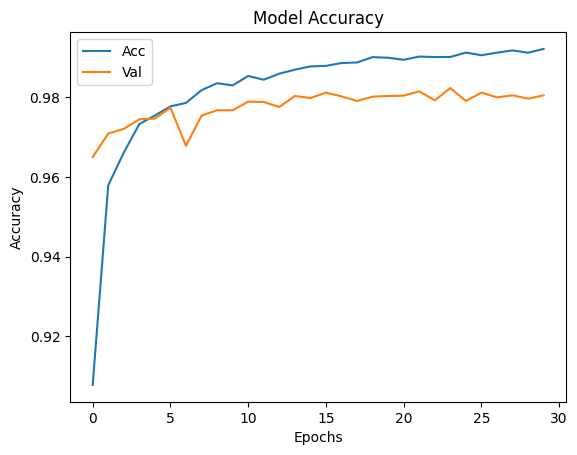

In [11]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Acc','Val'], loc = 'upper left')

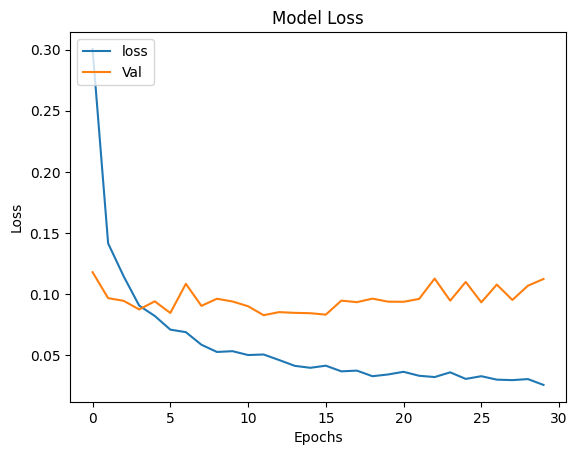

In [12]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss','Val'], loc = 'upper left')

In [13]:
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.0892 - accuracy: 0.9823
Test loss: 0.08916875720024109
Test accuracy: 0.9822999835014343


In [14]:
model.save('model.h5')
print("Saving the model as model.h5")

Saving the model as model.h5
